<a href="https://colab.research.google.com/github/j0h4nM/ciencia_de_datos-/blob/main/Ciencia_de_datos_Estimaci%C3%B3n_de_la_variabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ESTIMACIÓN DE LA VARIABILIDAD

## 1. Varianza:
Suma de los cuadrados de las desviaciones de la media al cuadrado dividida por n-1, donde **n** e el número de valores de datos
## 2. Desviación Estándar
Raíz cuadrada de la varianza
## 3. Desviación media absoluta
Media de valores absolutos de las desviaciones de la media.
## 4. Desviación absoluta de la mediana (MAD)
Mediana de los valores absolutos de las desviaciones de la mediana.
## 5. Rango
La diferencia entre el valor máximo y mínimo de un conjunto de datos
## 6. Estadística ordinal
Métricas basadas en los valores de datos ordenados de mayor a menor
## 7. Percentil
Valor tal que P por ciento de los valores toma este valor o oun vaor inferior y para (100-P) el porcentaje toma este valor superior
## 8. Rango Intercuartil (IQR)
Diferencia entre el percentil 75 y el percentil 25

In [ ]:
#Cargar dato desde google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install statsmodels

In [ ]:
!pip install wquantiles

In [ ]:
import pandas as pd
import numpy as np
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ciencia de datos/state.csv")

In [ ]:
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
data.tail(10)

,State,Population,Murder.Rate,Abbreviation
40,South Dakota,814180,2.3,SD
41,Tennessee,6346105,5.7,TN
42,Texas,25145561,4.4,TX
43,Utah,2763885,2.3,UT
44,Vermont,625741,1.6,VT
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [ ]:
data.sample(3)

,State,Population,Murder.Rate,Abbreviation
15,Kansas,2853118,3.1,KS
44,Vermont,625741,1.6,VT
13,Indiana,6483802,5.0,IN


###Overview de lo datos

In [ ]:
#Cuáles features se están trabajando
data.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [ ]:
data.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [ ]:
#Generar cálculos de deviación estándar y cuantiles
data["Population"].std()

6848235.347401142

In [ ]:
mayor_población= data.groupby(["Population"])["State"].max()

In [ ]:
mayor_población

,State
Population,
563626,Wyoming
625741,Vermont
672591,North Dakota
710231,Alaska
814180,South Dakota
897934,Delaware
989415,Montana
1052567,Rhode Island
1316470,New Hampshire


In [ ]:
#Calcular el IQR
data.Population.quantile(0.75)-data.Population.quantile(0.25)

np.float64(4847308.0)

In [ ]:
robust.scale.mad(data.Population)

np.float64(3849876.1459979336)

###Exploración de la ditribución de los datos

En este apartado se explorará:
1. Diagrama de caja: Visibilización rápida de la distribución de los datos.
2. Diagrama de frecuencias: Registro de recuento de valores de datos numéricos que caen en un conjunto de intervalos
3. Histograma: Diagrama de tabla de frecuencias con los intervalos en el eje x y el recuento en el eje y
4. Diagrama de densidad: Versión suavizada del histograma. A menudo basada en una **estimación de densidad del núcleo**.

In [ ]:
data.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [ ]:
#Calcular percentiles de la tasa de homicidios por estado
data["Murder.Rate"].quantile([0.05,0.25,0.75,0.95])

,Murder.Rate
0.05,1.600
0.25,2.425
0.75,5.550
0.95,6.510


Text(0, 0.5, 'Población en millones')

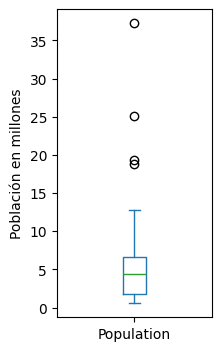

In [ ]:
#Dibujando diagrama de caja y bigotes
ax=(data.Population/1_000_000).plot.box(figsize=(2,4))
ax.set_ylabel("Población en millones")

In [ ]:
#Calculando la tabla de frecuencias e histogramas
binnedPopulation=pd.cut(data["Population"],10)
binnedPopulation.value_counts()

,count
Population,
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0


Text(0, 0.5, 'Población en millones')

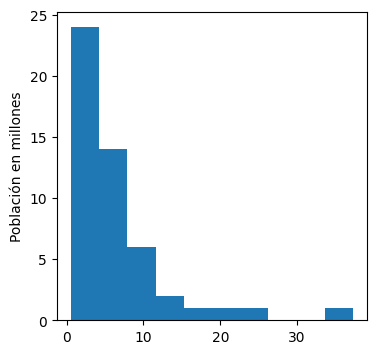

In [ ]:
ax=(data.Population/1_000_000).plot.hist(figsize=(4,4))
ax.set_ylabel("Población en millones")

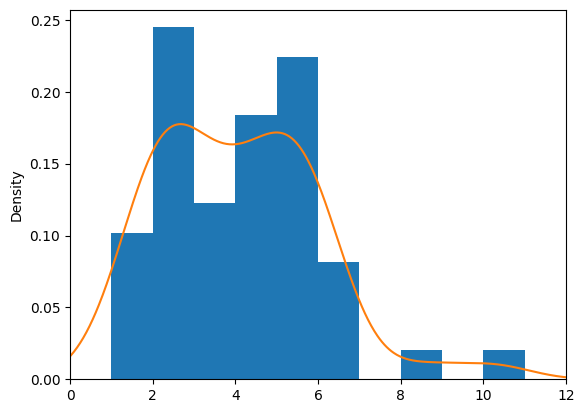

In [ ]:
#Diagrama de dispersión y curva de densidad
ax=data["Murder.Rate"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
data["Murder.Rate"].plot.density(ax=ax)
ax.set_label("Tasa de asesinatos por cada 1000000 habitantes")